In [53]:
from fastai.vision import *
from google.colab import drive
import os
import shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
path_for_zip = '/content/drive/My\ Drive/fast_ai/datasets/107582_309628_bundle_archive.zip'
path_data = '/content/data/'

In [6]:
os.mkdir('/content/data/')

In [9]:
! unzip {path_for_zip}

Archive:  /content/drive/My Drive/fast_ai/datasets/107582_309628_bundle_archive.zip
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating: paper/27XFtQjjXQ8AP8Tl.

In [12]:
shutil.move('/content/paper/', path_data)
shutil.move('/content/rock/',path_data)
shutil.move('/content/scissors/', path_data)


'/content/data/scissors'

In [13]:
targets = ['paper', 'rock', 'scissors']

In [14]:
path = Path('/content/data')

In [16]:
for t in targets:
  print(t)
  verify_images(path/t, delete=True, max_size=500)

paper


rock


scissors


## **Represent the data**

In [26]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data.classes

['paper', 'rock', 'scissors']

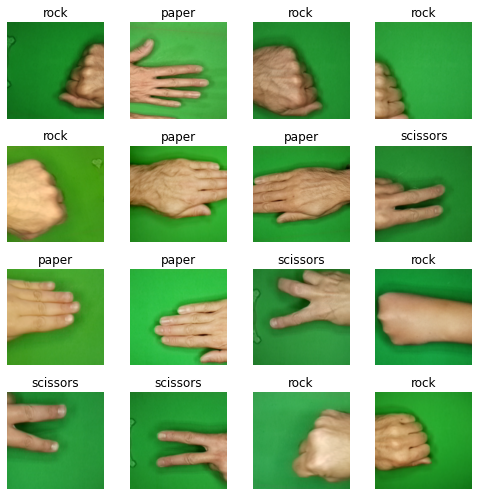

In [28]:
data.show_batch(rows=4, figsize=(7,7))

In [29]:
len(data.train_ds), len(data.valid_ds)

(1751, 437)

## **Train Model**

In [30]:
model = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [31]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


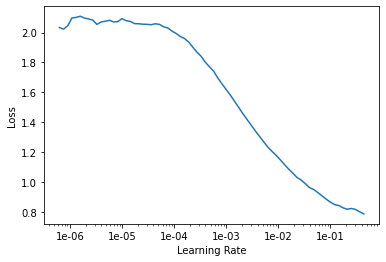

In [32]:
model.recorder.plot()

In [33]:
model.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.707009,0.020132,0.009153,00:20
1,0.319122,0.005726,0.000000,00:19


## **Testing**

In [70]:
img1 = open_image('/content/r.jpg')
img2 = open_image('/content/p.jpg')
img3 = open_image('/content/s1.jpg')

rock


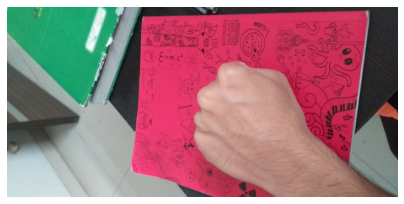

In [71]:
pred = model.predict(img1)
show_image(img1, figsize=(7,7))
print(model.data.classes[pred[1]])

paper


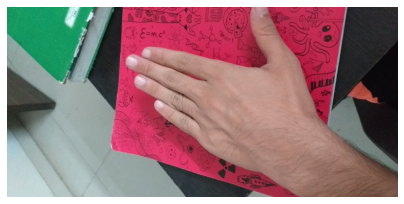

In [72]:
pred = model.predict(img2)
show_image(img2, figsize=(7,7))
print(model.data.classes[pred[1]])

scissors


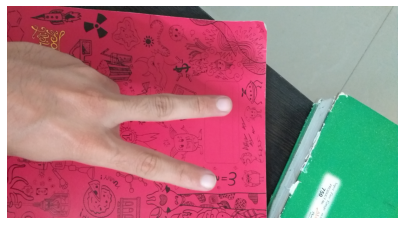

In [73]:
pred = model.predict(img3)
show_image(img3, figsize=(7,7))
print(model.data.classes[pred[1]])